<a href="https://colab.research.google.com/github/sensiboi/CODEALPHA_TASK/blob/main/A_B_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CODEALPHA TASK 3- A/B TESTING**

In [1]:
import pandas as pd

In [2]:
control_data=pd.read_csv('control_data.csv')
experiment_data=pd.read_csv('experiment_data.csv')

In [3]:
control_data.head()

,Date,Pageviews,Clicks,Enrollments,Payments
0,"Sat, Oct 11",7723,687,134.0,70.0
1,"Sun, Oct 12",9102,779,147.0,70.0
2,"Mon, Oct 13",10511,909,167.0,95.0
3,"Tue, Oct 14",9871,836,156.0,105.0
4,"Wed, Oct 15",10014,837,163.0,64.0


In [4]:
experiment_data.head()

,Date,Pageviews,Clicks,Enrollments,Payments
0,"Sat, Oct 11",7716,686,105.0,34.0
1,"Sun, Oct 12",9288,785,116.0,91.0
2,"Mon, Oct 13",10480,884,145.0,79.0
3,"Tue, Oct 14",9867,827,138.0,92.0
4,"Wed, Oct 15",9793,832,140.0,94.0


Exploratory Data Analysis

In [5]:
control_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         37 non-null     object 
 1   Pageviews    37 non-null     int64  
 2   Clicks       37 non-null     int64  
 3   Enrollments  23 non-null     float64
 4   Payments     23 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.6+ KB


In [6]:
experiment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         37 non-null     object 
 1   Pageviews    37 non-null     int64  
 2   Clicks       37 non-null     int64  
 3   Enrollments  23 non-null     float64
 4   Payments     23 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.6+ KB


In [9]:
control_data.isna().sum()

,0
Date,0
Pageviews,0
Clicks,0
Enrollments,14
Payments,14


In [8]:
experiment_data.isnull().sum()

,0
Date,0
Pageviews,0
Clicks,0
Enrollments,14
Payments,14


In [10]:
control_data[control_data['Enrollments'].isna()]

,Date,Pageviews,Clicks,Enrollments,Payments
23,"Mon, Nov 3",9437,788,NaN,NaN
24,"Tue, Nov 4",9420,781,NaN,NaN
25,"Wed, Nov 5",9570,805,NaN,NaN
26,"Thu, Nov 6",9921,830,NaN,NaN
27,"Fri, Nov 7",9424,781,NaN,NaN
28,"Sat, Nov 8",9010,756,NaN,NaN
29,"Sun, Nov 9",9656,825,NaN,NaN
30,"Mon, Nov 10",10419,874,NaN,NaN
31,"Tue, Nov 11",9880,830,NaN,NaN
32,"Wed, Nov 12",10134,801,NaN,NaN


In [11]:
data_total = pd.concat([control_data, experiment_data])
data_total.sample(10)

,Date,Pageviews,Clicks,Enrollments,Payments
4,"Wed, Oct 15",10014,837,163.0,64.0
1,"Sun, Oct 12",9288,785,116.0,91.0
29,"Sun, Nov 9",9697,850,NaN,NaN
7,"Sat, Oct 18",7664,652,94.0,62.0
15,"Sun, Oct 26",8896,708,161.0,104.0
36,"Sun, Nov 16",8970,722,NaN,NaN
19,"Thu, Oct 30",9308,728,207.0,67.0
21,"Sat, Nov 1",8448,695,142.0,100.0
3,"Tue, Oct 14",9867,827,138.0,92.0
27,"Fri, Nov 7",9272,767,NaN,NaN


In [12]:
import numpy as np
np.random.seed(7)
import sklearn.utils

# Add row id
data_total['row_id'] = data_total.index

# Create a Day of Week feature
data_total['DOW'] = data_total['Date'].str.slice(start=0, stop=3)

# Remove missing data
data_total.dropna(inplace=True)

# Add a binary column Experiment to denote
# if the data was part of the experiment or not (Random)
data_total['Experiment'] = np.random.randint(2, size=len(data_total))

# Remove missing data
data_total.dropna(inplace=True)

# Remove Date and Payments columns
del data_total['Date'], data_total['Payments']

# Shuffle the data
data_total = sklearn.utils.shuffle(data_total)

In [13]:
data_total.head()

,Pageviews,Clicks,Enrollments,row_id,DOW,Experiment
21,8460,681,156.0,21,Sat,0
3,9867,827,138.0,3,Tue,1
21,8448,695,142.0,21,Sat,0
13,9434,673,220.0,13,Fri,1
6,9008,748,146.0,6,Fri,1


In [14]:
data_total = data_total[['row_id', 'Experiment', 'Pageviews', 'Clicks', 'DOW', 'Enrollments']]

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_total.loc[:, data_total.columns != 'Enrollments'],\
                                                    data_total['Enrollments'], test_size=0.2)

In [16]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
X_train['DOW'] = lb.fit_transform(X_train['DOW'])
X_test['DOW'] = lb.transform(X_test['DOW'])

In [17]:
X_train.head()

,row_id,Experiment,Pageviews,Clicks,DOW
16,16,0,9535,759,1
10,10,1,10551,864,5
2,2,0,10480,884,1
3,3,1,9867,827,5
16,16,0,9655,771,1


In [18]:
X_test.head()

,row_id,Experiment,Pageviews,Clicks,DOW
12,12,0,8324,665,4
18,18,1,9262,727,6
1,1,0,9288,785,3
1,1,0,9102,779,3
19,19,0,9345,734,4


In [19]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def calculate_metrics(y_test, y_preds):
    rmse = np.sqrt(mean_squared_error(y_test, y_preds))
    r_sq = r2_score(y_test, y_preds)
    mae = mean_absolute_error(y_test, y_preds)

    print('RMSE Score: {}'.format(rmse))
    print('R2_Squared: {}'.format(r_sq))
    print('MAE Score: {}'.format(mae))

In [20]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

def plot_preds(y_test, y_preds, model_name):
    N = len(y_test)
    plt.figure(figsize=(10,5))
    original = plt.scatter(np.arange(1, N+1), y_test, c='blue')
    prediction = plt.scatter(np.arange(1, N+1), y_preds, c='red')
    plt.xticks(np.arange(1, N+1))
    plt.xlabel('# Oberservation')
    plt.ylabel('Enrollments')
    title = 'True labels vs. Predicted Labels ({})'.format(model_name)
    plt.title(title)
    plt.legend((original, prediction), ('Original', 'Prediction'))
    plt.show()

**Model 1 Linear Regression**

In [21]:
import statsmodels.api as sm
X_train_refined = X_train.drop(columns=['row_id'], axis=1)
linear_regression = sm.OLS(y_train, X_train_refined)
linear_regression = linear_regression.fit()

In [22]:
X_test_refined = X_test.drop(columns=['row_id'], axis=1)
y_preds = linear_regression.predict(X_test_refined)

In [23]:
calculate_metrics(y_test, y_preds)

RMSE Score: 23.988871314039848
R2_Squared: 0.050950018270393915
MAE Score: 19.5860618387751


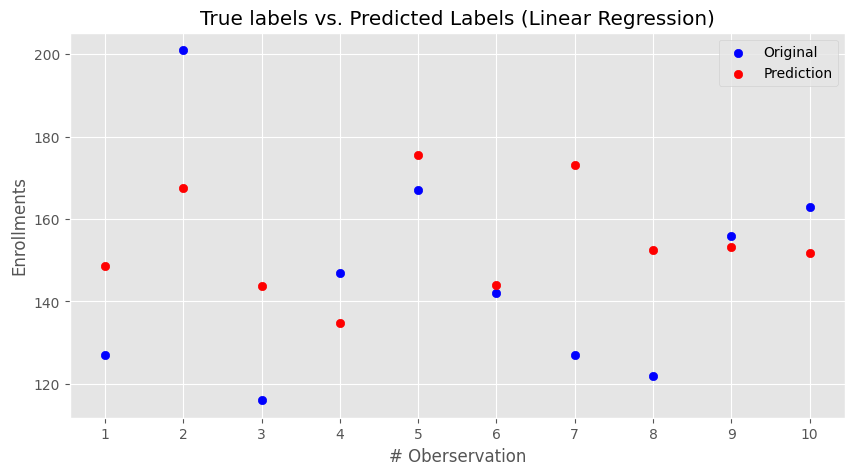

In [24]:
plot_preds(y_test, y_preds, 'Linear Regression')

In [25]:
print(linear_regression.summary())

                                 OLS Regression Results                                
Dep. Variable:            Enrollments   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.978
Method:                 Least Squares   F-statistic:                              400.1
Date:                Sat, 24 Aug 2024   Prob (F-statistic):                    7.92e-27
Time:                        10:44:10   Log-Likelihood:                         -163.65
No. Observations:                  36   AIC:                                      335.3
Df Residuals:                      32   BIC:                                      341.6
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [26]:
pd.DataFrame(linear_regression.pvalues)\
    .reset_index()\
    .rename(columns={'index':'Terms', 0:'p_value'})\
    .sort_values('p_value')

,Terms,p_value
1,Pageviews,1.974764e-07
2,Clicks,3.804647e-05
3,DOW,2.299762e-01
0,Experiment,8.634578e-01


**Model 2: Decision Tree**

In [27]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(max_depth=5, min_samples_leaf =4, random_state=7)
dtree.fit(X_train_refined, y_train)
y_preds = dtree.predict(X_test_refined)
calculate_metrics(y_test, y_preds)

RMSE Score: 26.8540034259326
R2_Squared: -0.1892893660531696
MAE Score: 21.78333333333333


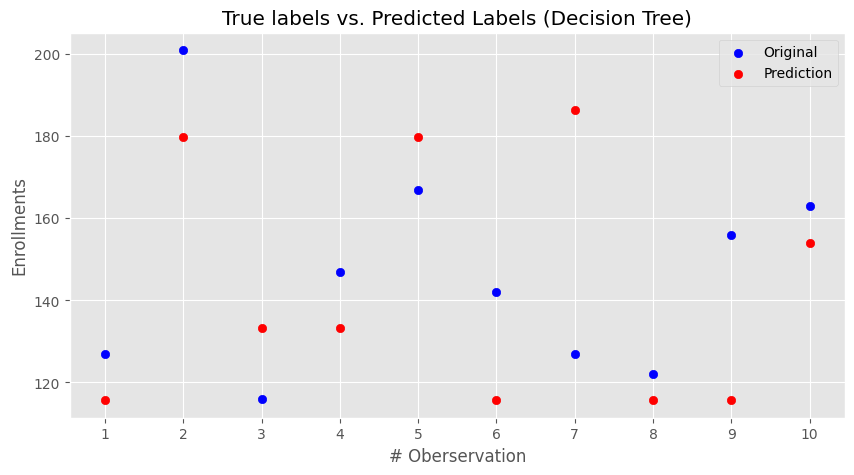

In [28]:
plot_preds(y_test, y_preds, 'Decision Tree')

In [30]:
import xgboost as xgb

In [31]:
DM_train = xgb.DMatrix(data=X_train_refined,label=y_train)
DM_test = xgb.DMatrix(data=X_test_refined,label=y_test)

In [32]:
parameters = {
    'max_depth': 6,
    'objective': 'reg:linear',
    'booster': 'gblinear',
    'n_estimators': 1000,
    'learning_rate': 0.2,
    'gamma': 0.01,
    'random_state': 7,
    'subsample': 1.
}

In [33]:
parameters = {
    'max_depth': 6,
    'objective': 'reg:linear',
    'booster': 'gblinear',
    'n_estimators': 1000,
    'learning_rate': 0.2,
    'gamma': 0.01,
    'random_state': 7,
    'subsample': 1.
}

In [34]:
xg_reg = xgb.train(params = parameters, dtrain=DM_train, num_boost_round=8)
y_preds = xg_reg.predict(DM_test)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:49:26] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:49:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "gamma", "max_depth", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


In [35]:
calculate_metrics(y_test, y_preds)

RMSE Score: 29.90171396506444
R2_Squared: -0.47455719052795375
MAE Score: 25.627415466308594


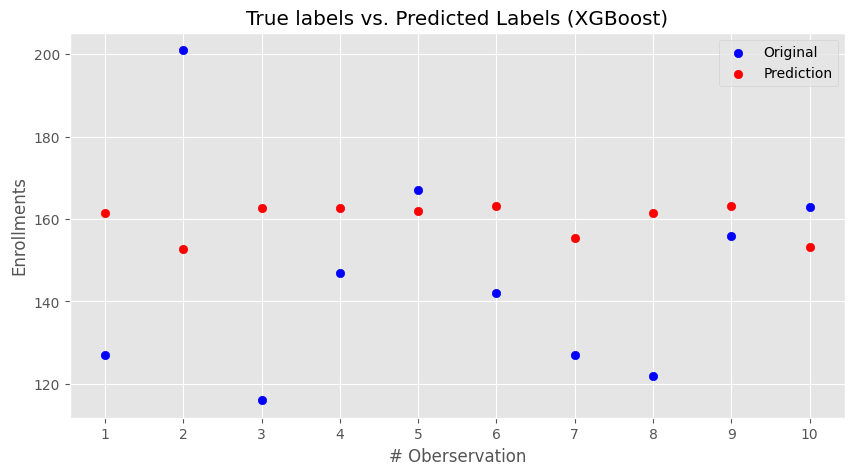

In [36]:
plot_preds(y_test, y_preds, 'XGBoost')